#**1. Business Understanding**

##**1.1. Business Problem**

> Perusahaan X telah memproduksi sparepart kendaraan bermotor sejak tahun 2000. Beberapa jenis sparepart diproduksi perusahaan X diantaranya bearing, crankshaft, piston, dan lain sebagainya. Perusahaan X ingin memperluas bisnisnya ke pasar mancanegara, namun saat melakukan produksi sering terjadi **kerusakan mesin (machine failure)** yang mengakibat munculnya biaya tambahan.

##**1.2. Business Metrics**

> Mengetahui penyebab terjadinya machine failure dengan bantuan model predictive maintenance

##**1.3. Business Goals**

> Memprediksi apakah mesin rusak atau tidak dengan akurat

#**2. Data Understanding**

##**2.1. About Dataset**

> - **UDI :** Unique Data Identifier (identifier unik untuk setiap data)
- **Product ID :** Identifier untuk produk yang diproduksi
- **Type :** Tipe produk yang diproduksi
- **Air temperature [K] :** Suhu udara di sekitar mesin produksi dalam satuan Kelvin
- **Process temperature [K] :** Suhu proses pada mesin produksi dalam satuan Kelvin
- **Rotational speed [rpm] :** Kecepatan putar mesin produksi dalam satuan revolutions per minute (rpm)
- **Torque [Nm] :** Torsi yang dihasilkan oleh mesin produksi dalam satuan Newton-meter (Nm)
- **Tool wear [min] :** Waktu pemakaian tool pada mesin produksi dalam satuan menit
- **Machine failure :** Variabel target yang menunjukkan apakah terjadi machine failure pada mesin produksi atau tidak (0: tidak ada failure, 1: ada failure)
- **TWF :** Variabel kategori yang menunjukkan apakah terjadi Tool Wear Failure pada mesin produksi atau tidak (0: tidak ada failure, 1: ada failure)
- **HDF :** Variabel kategori yang menunjukkan apakah terjadi Heat Dissipation Failure pada mesin produksi atau tidak (0: tidak ada failure, 1: ada failure)
- **PWF :** Variabel kategori yang menunjukkan apakah terjadi Power Failure pada mesin produksi atau tidak (0: tidak ada failure, 1: ada failure)
- **OSF :** Variabel kategori yang menunjukkan apakah terjadi Overstrain Failure pada mesin produksi atau tidak (0: tidak ada, 1: ada)
- **RNF :** Variabel kategori yang menunjukkan apakah terjadi Random Failure pada mesin produksi atau tidak (0: tidak ada, 1: ada)

##**2.2. Import Package**

In [ ]:
!gdown 1zJ_1JUW7fqWgxNHz71ksCrfpnm2ouaHk

Downloading...
From: https://drive.google.com/uc?id=1zJ_1JUW7fqWgxNHz71ksCrfpnm2ouaHk
To: /content/ai4i2020.csv
100% 522k/522k [00:00<00:00, 133MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder

##**2.3. Build Dataframe**

In [ ]:
# Membaca file CSV 'ai4i2020.csv' dan memuat datanya ke dalam dataframe df
df = pd.read_csv('ai4i2020.csv')

# Menampilkan lima baris pertama dari data dalam dataframe df
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


## **2.4. Unnecessary Columns/Rows**

In [ ]:
#Drop kolom UDI
df = df.drop(['UDI','Product ID'],axis=1)

##**2.5. Mengecek Baris dan Kolom**

In [ ]:
# Menampilkan jumlah baris dan kolom dalam dataframe df
print("Baris dan Kolom = ", df.shape)

Baris dan Kolom =  (10000, 12)


> **Bisa dilihat dari Output diatas bahwa di dalam data ini terdapat 10000 Baris dengan 12 Kolom**

##**2.6. Mengecek Tipe Data**

In [ ]:
# Menampilkan informasi mengenai dataframe df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   TWF                      10000 non-null  int64  
 8   HDF                      10000 non-null  int64  
 9   PWF                      10000 non-null  int64  
 10  OSF                      10000 non-null  int64  
 11  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB


> Bisa dilihat dari data Output diatas, Bahwa di dalam dataset tersebut Memiliki 3 jenis Data Type (dtypes: float64(3), int64(9), object(2))

> Berikut Tipe data dari setiap variable :

> - UDI = Int64
- Product ID = Object
- Type = Object
- Air temperature [K] = float64
- Process temperature [K] = float64
- Rotational speed [rpm] = Int64
- Torque [Nm] = float64
- Tool wear [min] = Int64
- Machine failure = Int64
- TWF = Int64
- HDF = Int64
- PWF = Int64
- OSF = Int64
- RNF = Int64

##**2.7. Deskripsi Statistik**

In [ ]:
# Menampilkan deskripsi statistik ringkas dari dataframe df, dengan hasil transposisi (T)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.0,0.0,0.0,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.0,0.0,0.0,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.0,0.0,0.0,1.0
OSF,10000.0,0.00980,0.098514,0.0,0.0,0.0,0.0,1.0


> - **Air temperature [K]** : Memiliki rata - rata sebesar **300** yang menyebar dari **295.3** sampai **304.5**
- **Process temperature [K]** : Memiliki rata - rata sebesar **310** yang menyebar dari **305.7** sampai **313.8**
- **Rotational speed [rpm]** : Memiliki rata - rata sebesar **1538.77** yang menyebar dari **1168.0** sampai **2886.0**
- **Torque [Nm]** : Memiliki rata - rata sebesar **39.98** yang menyebar dari **3.8** sampai **76.6**
- **Tool wear [min]** : Memiliki rata - rata sebesar **107.95** yang menyebar dari **0.0** sampai **253.0**

In [ ]:
# Mendefinisikan daftar con_features yang berisi nama-nama kolom fitur kontinu
con_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

In [ ]:
# Menghitung rata-rata fitur-fitur kontinu berdasarkan kolom 'Machine failure'
avg_machine_failure = df[con_features].groupby(df['Machine failure']).mean()

# Menampilkan rata-rata fitur-fitur kontinu berdasarkan kondisi 'Machine failure'
avg_machine_failure

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
Machine failure,,,,,
0,299.973999,309.995570,1540.260014,39.629655,106.693717
1,300.886431,310.290265,1496.486726,50.168142,143.781711


> Bisa kita lihat bahwa tabel di atas menunjukkan perbedaan signifikan pada nilai rata-rata **Rotational speed [rpm]**, **Torque [Nm]**, dan **Tool wear [min]** antara kondisi kerusakan mesin 0 (tidak rusak) dan 1 (rusak). Perbedaan ini menunjukkan kemungkinan adanya hubungan antara kerusakan mesin dan 3 fitur tersebut.

#**3. Data Preprocessing**

##**3.1. Data Cleaning**

###**3.1.1. Normalisasi Nama Kolom**

In [ ]:
# Menampilkan daftar kolom dalam dataframe df
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [ ]:
# Mengganti nama kolom dalam dataframe df
df.rename(columns = {'Type':'type',
                     'Air temperature [K]':'air_temperature_k',
                     'Process temperature [K]':'process_temperature_k',
                     'Rotational speed [rpm]':'rotational_speed_rpm',
                     'Torque [Nm]':'torque_nm',
                     'Tool wear [min]':'tool_wear_min',
                     'Machine failure':'machine_failure'}, inplace = True)

In [ ]:
# Menampilkan lima baris pertama dari dataframe df setelah penggantian nama kolom
df.head()

,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


###**3.1.2. Mengecek Missing Value**

In [ ]:
# Menghitung jumlah nilai null (NaN) dalam setiap kolom dataframe df
df.isnull().sum()

type                     0
air_temperature_k        0
process_temperature_k    0
rotational_speed_rpm     0
torque_nm                0
tool_wear_min            0
machine_failure          0
TWF                      0
HDF                      0
PWF                      0
OSF                      0
RNF                      0
dtype: int64

> Setiap baris dan kolom tidak ada missing values

###**3.1.3. Mengecek Nilai Duplikat**

In [ ]:
# Menghitung jumlah baris duplikat dalam dataframe df
df.duplicated().sum()

0

> Tidak ada nilai duplikat setiap baris

###**3.1.4. Mengecek Unique Value**

In [ ]:
# Membuat fungsi unique_value() untuk mencetak nilai unik dari setiap kolom dalam dataframe
def unique_value():
    for i in df.columns:
        print(i, df[i].unique())
        print('\n')

# Memanggil fungsi unique_value() untuk mencetak nilai unik dari setiap kolom dalam dataframe
unique_value()

type ['M' 'L' 'H']


air_temperature_k [298.1 298.2 298.3 298.5 298.4 298.6 298.7 298.8 298.9 299.  299.1 298.
 297.9 297.8 297.7 297.6 297.5 297.4 297.3 297.2 297.1 297.  296.9 296.8
 296.7 296.6 296.5 296.3 296.4 296.2 296.1 296.  295.9 295.8 295.7 295.6
 295.5 295.4 295.3 299.2 299.3 299.5 299.4 299.6 299.7 299.8 299.9 300.
 300.1 300.2 300.3 300.4 300.5 300.6 300.7 300.8 300.9 301.  301.1 301.2
 301.3 301.4 301.5 301.6 301.7 301.8 301.9 302.  302.1 302.2 302.3 302.4
 302.5 302.6 302.7 302.8 302.9 303.  303.1 303.2 303.3 303.4 303.5 303.6
 303.7 303.8 303.9 304.  304.1 304.2 304.3 304.4 304.5]


process_temperature_k [308.6 308.7 308.5 309.  308.9 309.1 309.2 309.3 309.4 309.5 308.8 308.4
 308.3 308.2 308.1 308.  307.9 309.6 309.7 309.8 309.9 310.  310.1 310.2
 307.8 307.7 307.6 307.5 307.4 307.3 307.2 307.1 307.  306.9 306.8 306.7
 306.6 306.5 306.4 306.3 306.2 306.1 306.  305.9 305.8 305.7 310.3 310.4
 310.5 310.6 310.7 310.8 310.9 311.  311.1 311.2 311.3 311.4 311.5 311.6
 311.7 

> Tidak ada nilai yang tidak valid

###**3.1.5. Mengecek Noise Machine failure**

In [ ]:
# Membuat variabel total_ntv_1 untuk menghitung jumlah nilai tidak valid pada machine failure 1 dan semua jenis kerusakan 0
total_ntv_1 = df.machine_failure[((df.machine_failure == 1) & (df.TWF == 0) & (df.HDF == 0) & (df.PWF == 0) & (df.OSF == 0) & (df.RNF == 0))].count()

# Menampilkan total nilai machine failure adalah 1 dan semua jenis kerusakan adalah 0
print('Total nilai machine failure adalah 1 dan semua jenis kerusakan adalah 0 = ', total_ntv_1)

# Menampilkan baris-baris dari dataframe yang memenuhi kondisi machine failure adalah 1 dan semua jenis kerusakan adalah 0
df[((df.machine_failure == 1) & (df.TWF == 0) & (df.HDF == 0) & (df.PWF == 0) & (df.OSF == 0) & (df.RNF == 0))]

Total nilai machine failure adalah 1 dan semua jenis kerusakan adalah 0 =  9


,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,TWF,HDF,PWF,OSF,RNF
1437,H,298.8,309.9,1439,45.2,40,1,0,0,0,0,0
2749,M,299.7,309.2,1685,28.9,179,1,0,0,0,0,0
4044,M,301.9,310.9,1419,47.7,20,1,0,0,0,0,0
4684,M,303.6,311.8,1421,44.8,101,1,0,0,0,0,0
5536,M,302.3,311.8,1363,54.0,119,1,0,0,0,0,0
5941,L,300.6,310.7,1438,48.5,78,1,0,0,0,0,0
6478,L,300.5,309.8,1663,29.1,145,1,0,0,0,0,0
8506,L,298.4,309.6,1710,27.3,163,1,0,0,0,0,0
9015,L,297.2,308.1,1431,49.7,210,1,0,0,0,0,0


In [ ]:
# Menghapus baris-baris dari dataframe yang memenuhi kondisi machine failure adalah 1 dan semua jenis kerusakan adalah 0
df = df[~((df.machine_failure == 1) & (df.TWF == 0) & (df.HDF == 0) & (df.PWF == 0) & (df.OSF == 0) & (df.RNF == 0))]

# Menghitung kembali total nilai machine failure adalah 1 dan semua jenis kerusakan adalah 0 setelah penghapusan baris
total_ntv_1 = df.machine_failure[((df.machine_failure == 1) & (df.TWF == 0) & (df.HDF == 0) & (df.PWF == 0) & (df.OSF == 0) & (df.RNF == 0))].count()

# Menampilkan total nilai machine failure adalah 1 dan semua jenis kerusakan adalah 0 setelah penghapusan baris
print('Total nilai machine failure adalah 1 dan semua jenis kerusakan adalah 0 = ', total_ntv_1)


Total nilai machine failure adalah 1 dan semua jenis kerusakan adalah 0 =  0


In [ ]:
# Menghitung jumlah nilai machine failure adalah 0 dan setiap jenis kerusakannya setidaknya memiliki nilai 1
total_ntv_0 = df.machine_failure[(df.machine_failure == 0) & ((df.TWF == 1) | (df.HDF == 1) | (df.PWF == 1) | (df.OSF == 1) | (df.RNF == 1))].count()

# Menampilkan total nilai machine failure adalah 0 dan setiap jenis kerusakannya setidaknya memiliki nilai 1
print('Total nilai machine failure adalah 0 dan setiap jenis kerusakannya setidaknya memiliki nilai 1 = ', total_ntv_0)

# Menampilkan baris-baris dari dataframe yang memenuhi kondisi machine failure adalah 0 dan setiap jenis kerusakannya setidaknya memiliki nilai 1
df[(df.machine_failure == 0) & ((df.TWF == 1) | (df.HDF == 1) | (df.PWF == 1) | (df.OSF == 1) | (df.RNF == 1))]

Total nilai machine failure adalah 0 dan setiap jenis kerusakannya setidaknya memiliki nilai 1 =  18


,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,TWF,HDF,PWF,OSF,RNF
1221,M,297.0,308.3,1399,46.4,132,0,0,0,0,0,1
1302,L,298.6,309.8,1505,45.7,144,0,0,0,0,0,1
1748,H,298.4,307.7,1626,31.1,166,0,0,0,0,0,1
2072,L,299.6,309.5,1570,35.5,189,0,0,0,0,0,1
2559,L,299.3,309.0,1447,50.4,140,0,0,0,0,0,1
3065,M,300.1,309.2,1687,27.7,95,0,0,0,0,0,1
3452,H,301.6,310.5,1602,32.3,2,0,0,0,0,0,1
5471,L,302.7,312.3,1346,61.2,170,0,0,0,0,0,1
5489,L,302.6,312.1,1499,35.0,215,0,0,0,0,0,1
5495,H,302.9,312.5,1357,55.0,12,0,0,0,0,0,1


In [ ]:
# Mengganti nilai 0 menjadi 1 pada kolom machine_failure untuk baris-baris yang memenuhi kondisi setidaknya satu jenis kerusakan memiliki nilai 1
df.loc[(df.TWF == 1) | (df.HDF == 1) | (df.PWF == 1) | (df.OSF == 1) | (df.RNF == 1), "machine_failure"] = 1

# Menghitung jumlah nilai machine failure adalah 0 dan setiap jenis kerusakannya setidaknya memiliki nilai 1 setelah perubahan nilai
total_ntv_0 = df.machine_failure[(df.machine_failure == 0) & ((df.TWF == 1) | (df.HDF == 1) | (df.PWF == 1) | (df.OSF == 1) | (df.RNF == 1))].count()

# Menampilkan total nilai machine failure adalah 0 dan setiap jenis kerusakannya setidaknya memiliki nilai 1 setelah perubahan nilai
print('Total nilai machine failure adalah 0 dan setiap jenis kerusakannya setidaknya memiliki nilai 1 = ', total_ntv_0)

Total nilai machine failure adalah 0 dan setiap jenis kerusakannya setidaknya memiliki nilai 1 =  0


> Bisa dilihat bahwa terdapat nilai yang tidak sesuai pada kolom machine failure, TWF, HDF, PWF, OSF, RNF di setiap baris dan sudah di drop. Nilai yang tidak sesuai antara lain :
- Machine failure adalah 1 tetapi semua jenis kerusakan adalah 0.
- Machine failure adalah 0 tetapi setidaknya satu dari lima kolom jenis kerusakan memiliki nilai 1.

###**3.1.6. Mengecek Outliers**

In [ ]:
# Membuat function pengecekan outliers dengan spesifik kolom
def outliers(self, fitur):
    # Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
    Q1 = np.percentile(self[fitur], 25)
    Q3 = np.percentile(self[fitur], 75)

    # Menghitung rentang interkuartil (IQR)
    IQR = Q3 - Q1

    # Menghitung batas bawah dan batas atas untuk outlier
    batas_bawah = Q1 - (1.5 * IQR)
    batas_atas = Q3 + (1.5 * IQR)

    # Mencari data yang merupakan outlier
    outliers = self[(self[fitur] < batas_bawah) | (self[fitur] > batas_atas)]

    # Mengembalikan data outlier
    return outliers

# Menambahkan metode outliers ke kelas DataFrame
pd.DataFrame.outliers = outliers

In [ ]:
# Membuat function menghapus outliers
def remove_outliers(df, fitur):
    # Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
    Q1 = np.percentile(df[fitur], 25)
    Q3 = np.percentile(df[fitur], 75)

    # Menghitung rentang interkuartil (IQR)
    IQR = Q3 - Q1

    # Menghitung batas bawah dan batas atas untuk outlier
    batas_bawah = Q1 - (1.5 * IQR)
    batas_atas = Q3 + (1.5 * IQR)

    # Menghapus data yang merupakan outlier
    df = df[(df[fitur] >= batas_bawah) & (df[fitur] <= batas_atas)]

    # Mengembalikan DataFrame tanpa outliers
    return df

In [ ]:
# Mengecek outliers pada kolom air_temperature_k
df.outliers('air_temperature_k')

,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,TWF,HDF,PWF,OSF,RNF


In [ ]:
# Mengecek outliers pada kolom process_temperature_k
df.outliers('process_temperature_k')

,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,TWF,HDF,PWF,OSF,RNF


In [ ]:
# Mengecek outliers pada kolom rotational_speed_rpm
df.outliers('rotational_speed_rpm')

,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,TWF,HDF,PWF,OSF,RNF
14,L,298.6,309.2,2035,19.6,40,0,0,0,0,0,0
50,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
70,M,298.9,309.0,1924,22.6,193,0,0,0,0,0,0
101,L,298.8,308.8,1991,20.7,59,0,0,0,0,0,0
155,H,298.4,308.2,1987,19.8,198,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9865,M,298.9,309.8,2450,13.9,89,0,0,0,0,0,0
9871,M,298.9,309.8,1947,21.7,105,0,0,0,0,0,0
9886,L,298.8,309.6,1903,22.3,145,0,0,0,0,0,0
9926,M,298.5,308.6,1897,20.2,50,0,0,0,0,0,0


In [ ]:
# Mengecek outliers pada kolom torque_nm
df.outliers('torque_nm')

,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,TWF,HDF,PWF,OSF,RNF
50,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
194,M,298.2,308.5,2678,10.7,86,1,0,0,1,0,0
380,L,297.5,308.3,2564,12.8,127,1,0,0,1,0,0
463,L,297.4,308.7,2874,4.2,118,1,0,0,1,0,0
603,L,297.9,309.8,1336,71.6,31,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8398,L,298.5,309.7,2617,12.1,102,1,0,0,1,0,0
8582,M,297.5,308.1,1334,72.0,151,1,0,0,1,0,0
9084,L,297.2,307.9,1326,75.4,172,1,0,0,1,1,0
9939,H,298.3,308.1,2636,12.8,84,0,0,0,0,0,0


In [ ]:
# Mengecek outliers pada kolom tool_wear_min
df.outliers('tool_wear_min')

,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,TWF,HDF,PWF,OSF,RNF


In [ ]:
# Menghapus outliers pada kolom rotational_speed_rpm
df = remove_outliers(df, 'rotational_speed_rpm')

In [ ]:
  # Menghapus outliers pada kolom torque_nm
df = remove_outliers(df, 'torque_nm')

> Terdapat nilai outliers pada fitur 'rotational_speed_rpm' sebanyak 418 data dan 'torque_nm' sebanyak 70 data, dan total outliers < 5% maka outliers di-drop.

###**3.1.7. Mengecek Data Imbalance**

In [ ]:
# Menghitung jumlah nilai unik dalam kolom 'machine_failure'
df['machine_failure'].value_counts()

0    9254
1     272
Name: machine_failure, dtype: int64

In [ ]:
# Menghitung jumlah nilai unik dalam kolom 'TWF'
df['TWF'].value_counts()

0    9484
1      42
Name: TWF, dtype: int64

In [ ]:
# Menghitung jumlah nilai unik dalam kolom 'HDF'
df['HDF'].value_counts()

0    9416
1     110
Name: HDF, dtype: int64

In [ ]:
# Menghitung jumlah nilai unik dalam kolom 'PWF'
df['PWF'].value_counts()

0    9499
1      27
Name: PWF, dtype: int64

In [ ]:
# Menghitung jumlah nilai unik dalam kolom 'OSF'
df['OSF'].value_counts()

0    9438
1      88
Name: OSF, dtype: int64

In [ ]:
# Menghitung jumlah nilai unik dalam kolom 'RNF'
df['RNF'].value_counts()

0    9507
1      19
Name: RNF, dtype: int64

> Data  imbalance, maka dapat dilakukan *oversampling* pada kelas minoritas dan *undersampling* pada kelas mayoritas, atau menggunakan SMOTE agar lebih sensitif terhadap kelas minoritas.

##**3.2. EDA**

###**3.2.1. Korelasi**

In [ ]:
# Menghitung korelasi antar kolom menggunakan metode spearman
df.corr('spearman')

<ipython-input-328-33b07348d80f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr('spearman')


,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,TWF,HDF,PWF,OSF,RNF
air_temperature_k,1.000000,0.864083,0.007853,-0.005667,0.016115,0.092948,0.010356,0.138769,-0.002938,-0.000018,0.020072
process_temperature_k,0.864083,1.000000,0.013904,-0.011183,0.016647,0.046520,0.005479,0.064752,-0.010316,0.002659,0.024016
rotational_speed_rpm,0.007853,0.013904,1.000000,-0.903748,0.005110,-0.185163,-0.000173,-0.161156,-0.054936,-0.126523,-0.009431
torque_nm,-0.005667,-0.011183,-0.903748,1.000000,-0.005881,0.186220,-0.010923,0.136133,0.090705,0.148173,0.011952
tool_wear_min,0.016115,0.016647,0.005110,-0.005881,1.000000,0.115557,0.108365,-0.003531,-0.000580,0.149012,0.011669
machine_failure,0.092948,0.046520,-0.185163,0.186220,0.115557,1.000000,0.388159,0.630439,0.310973,0.563225,0.260757
TWF,0.010356,0.005479,-0.000173,-0.010923,0.108365,0.388159,1.000000,-0.007193,0.026256,0.043260,0.032538
HDF,0.138769,0.064752,-0.161156,0.136133,-0.003531,0.630439,-0.007193,1.000000,-0.005762,0.040917,-0.004832
PWF,-0.002938,-0.010316,-0.054936,0.090705,-0.000580,0.310973,0.026256,-0.005762,1.000000,0.098052,-0.002383
OSF,-0.000018,0.002659,-0.126523,0.148173,0.149012,0.563225,0.043260,0.040917,0.098052,1.000000,-0.004317


<ipython-input-34-398e13d57b72>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr('spearman')
<ipython-input-34-398e13d57b72>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0, 0.5, 'air_temperature_k'),
  Text(0, 1.5, 'process_temperature_k'),
  Text(0, 2.5, 'rotational_speed_rpm'),
  Text(0, 3.5, 'torque_nm'),
  Text(0, 4.5, 'tool_wear_min'),
  Text(0, 5.5, 'machine_failure'),
  Text(0, 6.5, 'TWF'),
  Text(0, 7.5, 'HDF'),
  Text(0, 8.5, 'PWF'),
  Text(0, 9.5, 'OSF'),
  Text(0, 10.5, 'RNF')])

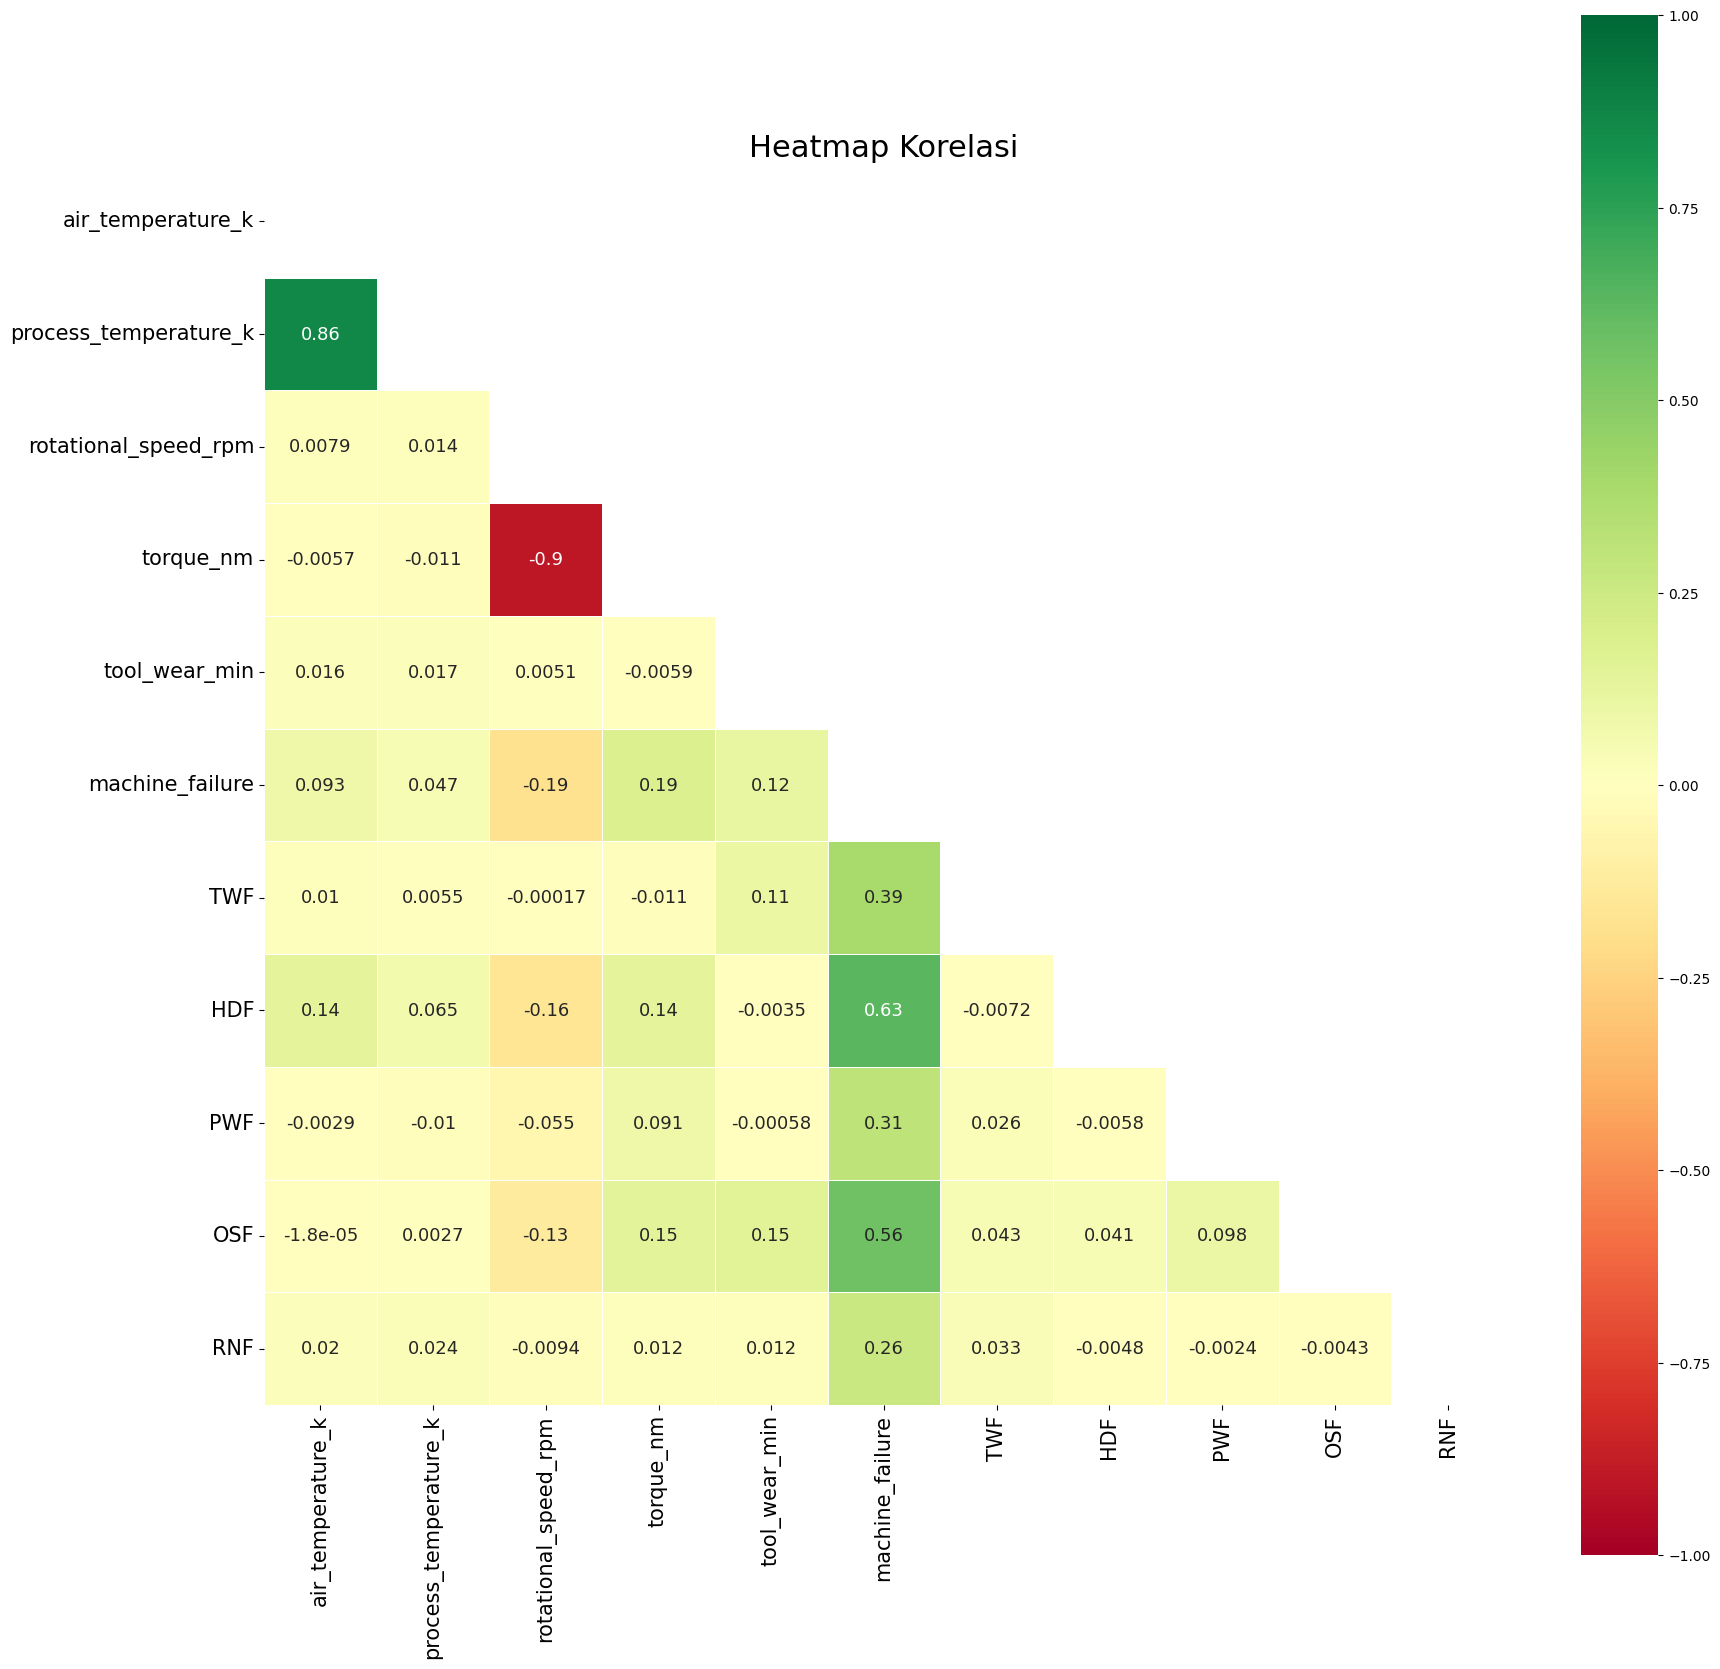

In [ ]:
# Heatmap Korelasi
corr = df.corr('spearman')

# Membuat mask untuk segitiga atas
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Menyiapkan figure matplotlib
f, ax = plt.subplots(figsize=(20, 20))

# Membuat colormap diverging kustom
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Menggambar heatmap dengan mask dan rasio aspek yang benar
sns.heatmap(corr, mask=mask, cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot=True,
            square=True, linewidths=.7, annot_kws={"size": 13})
plt.xticks(rotation=90, fontsize=15)
plt.title('Heatmap Korelasi', fontsize=22)
plt.yticks(fontsize=15)

***
 **Insight**
***

Korelasi yang paling kuat antar variabel X :
- Torque vs Rotational Speed (-0.9)
- Process Temperature vs Air Temperature (0.86)

**variabel Y = Machine Failure**  
*Note : Abaikan TWF, HDF, PWF, OSF, RNF*

Korelasinya sebagai berikut :
- Air Temperature vs Machine Failure (0.092)
- Process Temperaure vs Machine Failure (0.042)
- Rotational Speed vs Machine Failure (-0.19)
- Torque vs Machine Failure (0.19)
- Tool Wear vs Machine Failure (0.12)

Kelima variabel X memiliki korelasi yang lemah antar variabel Y.

###**3.2.2. Distribusi**

<ipython-input-330-ba7c8c90303b>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-330-ba7c8c90303b>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-330-ba7c8c90303b>:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.st

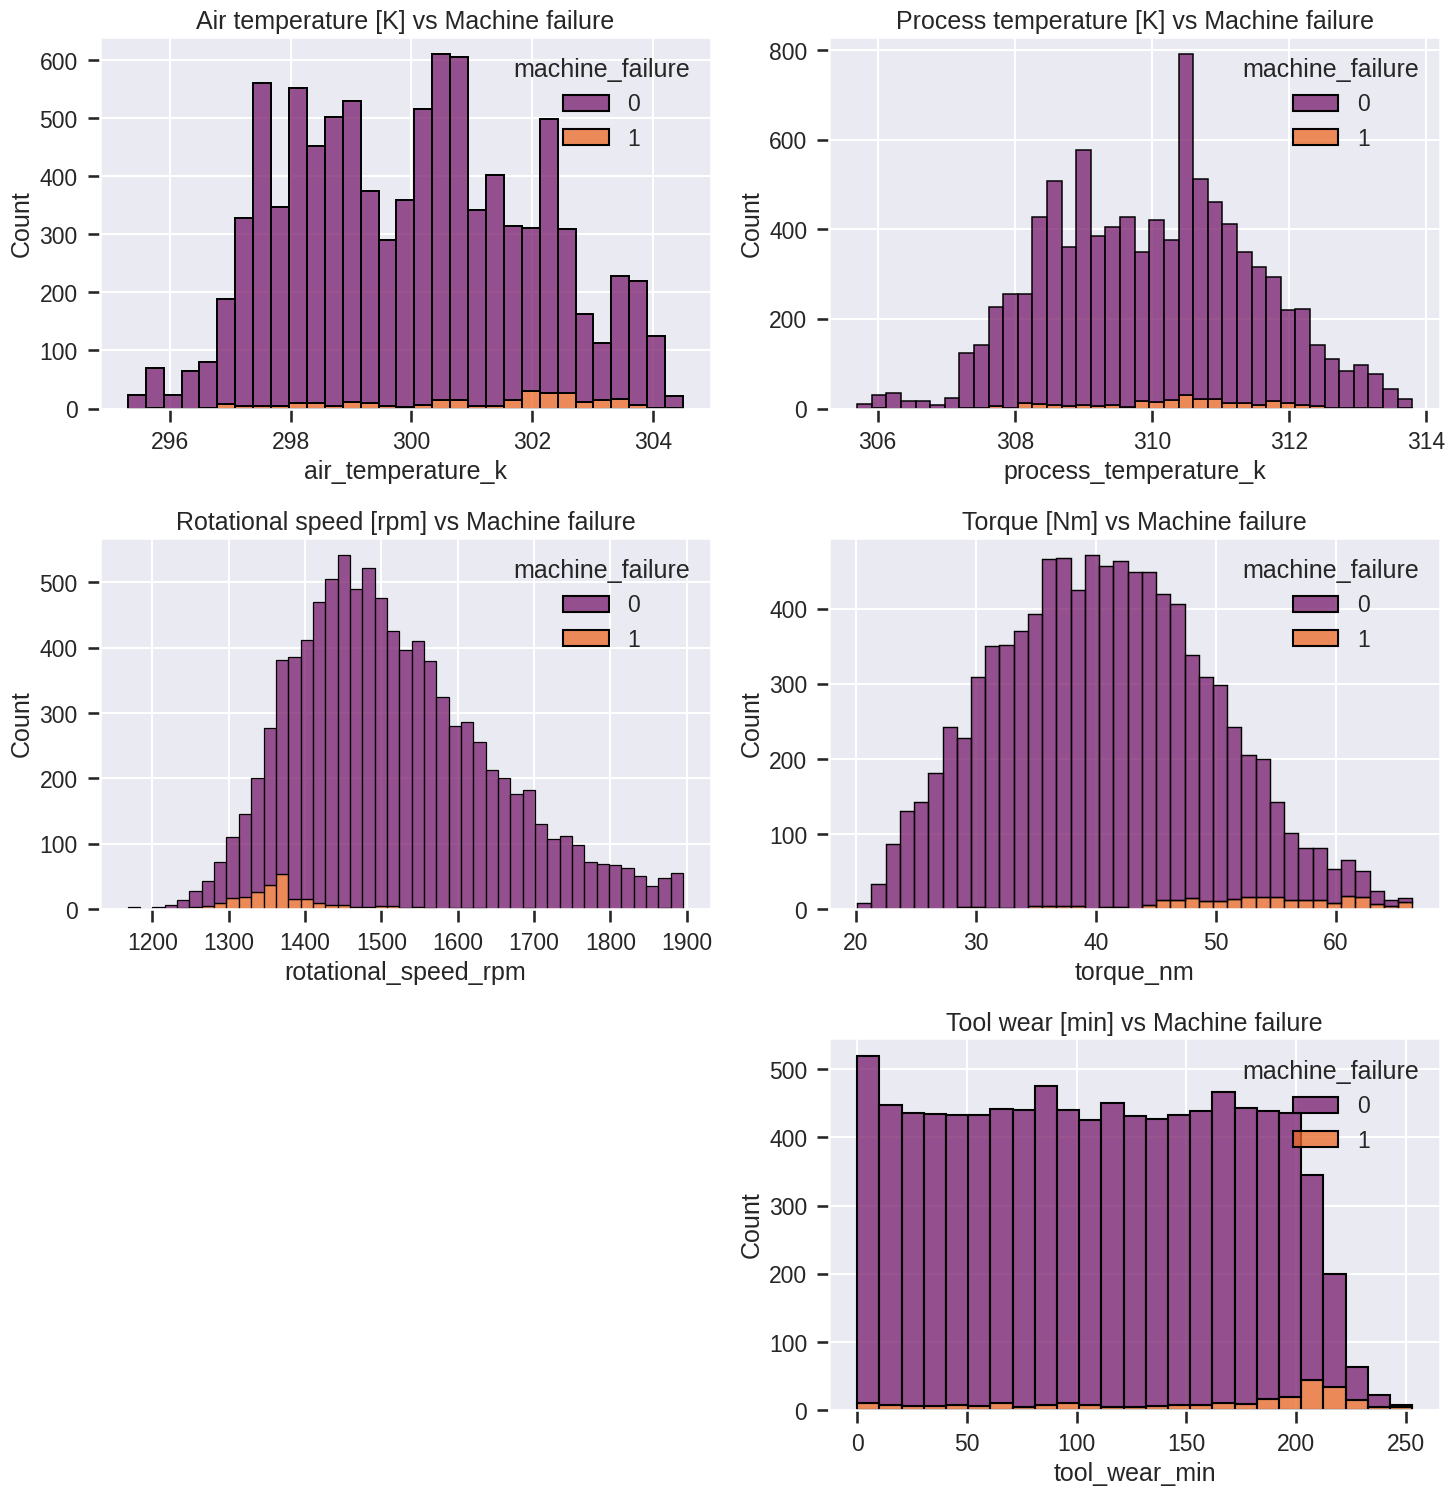

In [ ]:
# Check distibusi untuk variabel numerik
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='air_temperature_k', hue="machine_failure",multiple="stack",palette='inferno')
plt.title('Air temperature [K] vs Machine failure')

plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='process_temperature_k', hue="machine_failure",multiple="stack",palette='inferno')
plt.title('Process temperature [K] vs Machine failure')

plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='rotational_speed_rpm', hue="machine_failure",multiple="stack",palette='inferno')
plt.title('Rotational speed [rpm] vs Machine failure')

plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='torque_nm', hue="machine_failure",multiple="stack",palette='inferno')
plt.title('Torque [Nm] vs Machine failure')

plt.subplot(3,2,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='tool_wear_min', hue="machine_failure",multiple="stack",palette='inferno')
plt.title('Tool wear [min] vs Machine failure')
plt.show()

***
 **Insight**
***

Sebaran distribusi untuk variabel numerik/kontinu :
- Dataset sebaran Air Temperature memiliki sebaran normal (no skewed) karena nilai mean=299.99 dan median=300.1 tidak memiliki rentang yang jauh.
- Dataset sebaran Process Temperature memiliki sebaran normal (no skewed) karena nilai mean=310 dan median=310.1 tidak memiliki rentang yang jauh.
- Dataset sebaran Rotational Speed lebih banyak menyebar di sekitar nilai minimum (right skewed/positive skewed) jika dilihat dari nilai mean=1515.34 > median=1497.
- Dataset sebaran Torque memiliki sebaran normal (no skewed) karena nilai mean=40.77 dan median=40.6 tidak memiliki rentang yang jauh.
- Dataset sebaran Tool wear memiliki sebaran normal (no skewed) karena nilai mean=108.02 dan median=108 tidak memiliki rentang yang jauh.

### **3.2.3 Pairplot**

In [ ]:
# Mengambil subset dataframe 'df' yang hanya terdiri dari kolom-kolom numerik
Numeric_df = df.iloc[:, 1:7]
Numeric_df

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0
9996,298.9,308.4,1632,31.8,17,0
9997,299.0,308.6,1645,33.4,22,0
9998,299.0,308.7,1408,48.5,25,0


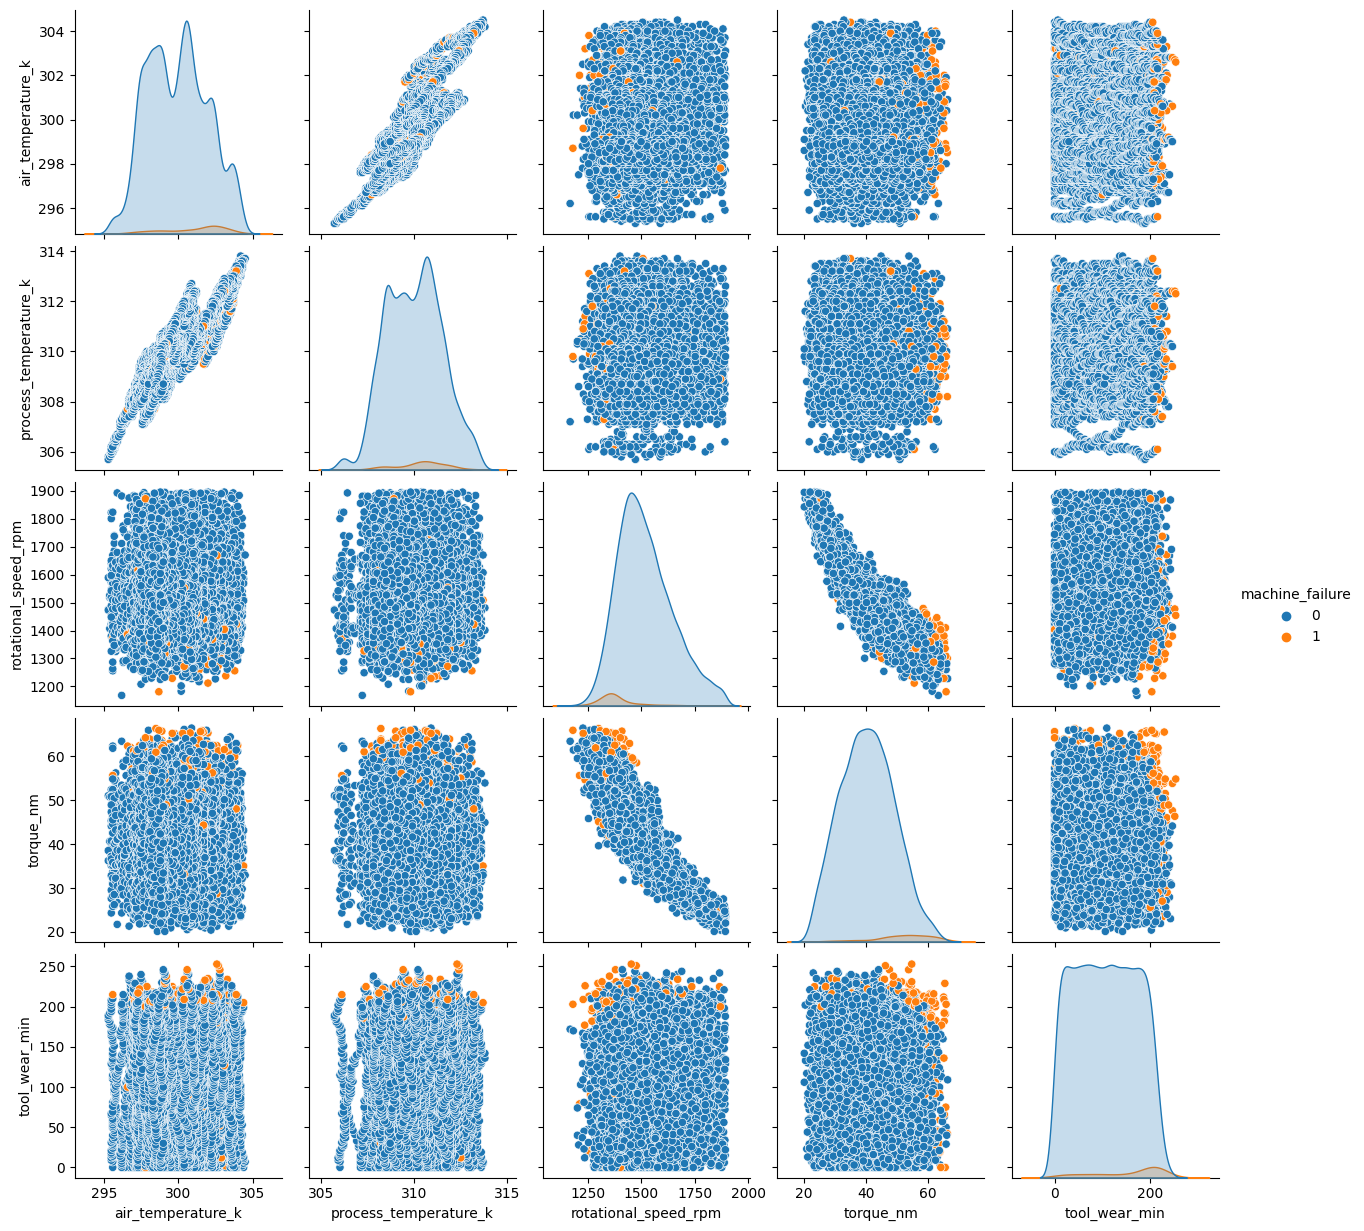

In [ ]:
# Memmbuat pair plot (scatter plot matrix) dari subset dataframe 'Numeric_df'
sns.pairplot(Numeric_df, hue='machine_failure')

##**3.3. Feature Engineering**

In [ ]:
# Membuat dictionary mapping dari kategori ke angka
map = {'L' : 0, 'M' : 1, 'H' : 2}

# Melakukan label encoding menggunakan metode replace
df['type_encode'] = df['type'].replace(map)

# Drop kolom "Type"
df = df.drop('type',axis=1)

# Menampilkan Dataset hasil feature engineering
df.head()

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,TWF,HDF,PWF,OSF,RNF,type_encode
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0


> Label encoding dilakukan pada fitur "type", dimana pada kasus ini L diwakili oleh 0, M oleh 1, dan H oleh 2.

> Dengan melakukan label encoding, model dapat memahami pola terkait  tingkat kegagalan mesin, dan memperkirakan kemungkinan kegagalan mesin yang akan terjadi berdasarkan tingkat keparahan yang terjadi. Dalam hal ini, label encoding berguna dalam meningkatkan akurasi prediksi kegagalan mesin.

In [ ]:
# mengubah kolom "process_temperature_k" ke dalam satuan Celsius
df['process_temperature_c'] = (df['process_temperature_k'] - 273.15).round(2)

# Drop kolom "process_temperature_k"
df = df.drop('process_temperature_k',axis=1)

# Menampilkan Dataset
df.head()

,air_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,TWF,HDF,PWF,OSF,RNF,type_encode,process_temperature_c
0,298.1,1551,42.8,0,0,0,0,0,0,0,1,35.45
1,298.2,1408,46.3,3,0,0,0,0,0,0,0,35.55
2,298.1,1498,49.4,5,0,0,0,0,0,0,0,35.35
3,298.2,1433,39.5,7,0,0,0,0,0,0,0,35.45
4,298.2,1408,40.0,9,0,0,0,0,0,0,0,35.55


In [ ]:
# mengubah kolom "air_temperature_k" ke dalam satuan Celsius
df['air_temperature_c'] = (df['air_temperature_k'] - 273.15).round(2)

# Drop kolom "air_temperature_k"
df = df.drop('air_temperature_k',axis=1)

# Menampilkan Dataset
df.head()

,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,TWF,HDF,PWF,OSF,RNF,type_encode,process_temperature_c,air_temperature_c
0,1551,42.8,0,0,0,0,0,0,0,1,35.45,24.95
1,1408,46.3,3,0,0,0,0,0,0,0,35.55,25.05
2,1498,49.4,5,0,0,0,0,0,0,0,35.35,24.95
3,1433,39.5,7,0,0,0,0,0,0,0,35.45,25.05
4,1408,40.0,9,0,0,0,0,0,0,0,35.55,25.05


##**3.4. Reindexing Column**

In [ ]:
# Mendapatkan daftar kolom dalam dataframe 'df'
list(df.columns)

['type_encode',
 'rotational_speed_rpm',
 'torque_nm',
 'tool_wear_min',
 'machine_failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF',
 'process_temperature_c',
 'air_temperature_c']

In [ ]:
# Mengatur urutan kolom dalam dataframe 'df' sesuai dengan daftar kolom yang ditentukan
df = df[['type_encode', 'process_temperature_c', 'air_temperature_c',
         'rotational_speed_rpm', 'torque_nm', 'tool_wear_min',
         'machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']]
df.head()

,type_encode,process_temperature_c,air_temperature_c,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,TWF,HDF,PWF,OSF,RNF
0,1,35.45,24.95,1551,42.8,0,0,0,0,0,0,0
1,0,35.55,25.05,1408,46.3,3,0,0,0,0,0,0
2,0,35.35,24.95,1498,49.4,5,0,0,0,0,0,0
3,0,35.45,25.05,1433,39.5,7,0,0,0,0,0,0
4,0,35.55,25.05,1408,40.0,9,0,0,0,0,0,0


##**3.5. Eksplorasi Mesin yang Rusak Berdasarkan Jenis Kerusakan**

In [ ]:
# Daftar array yang akan di-scale
ptemp = list(df['process_temperature_c'])
atemp = list(df['air_temperature_c'])
rpm = list(df['rotational_speed_rpm'])
tor = list(df['torque_nm'])
twear = list(df['tool_wear_min'])

# Fungsi untuk melakukan scaling pada array
def scale_array(arr, new_min=0, new_max=5):
    arr_min = np.min(arr)
    arr_max = np.max(arr)
    scaled_arr = ((arr - arr_min) / (arr_max - arr_min)) * (new_max - new_min) + new_min
    return scaled_arr

# Menyimpan daftar array yang akan di-scale
arrays = [ptemp, atemp, rpm, tor, twear]

# Melakukan scaling pada setiap array dan menggantinya dengan nilai yang di-scale
for i in range(len(arrays)):
    scaled_array = scale_array(arrays[i], new_min=0, new_max=5)
    arrays[i] = scaled_array

# Mendapatkan array yang telah di-scale
ptemp_scaled = arrays[0]
atemp_scaled = arrays[1]
rpm_scaled = arrays[2]
tor_scaled = arrays[3]
twear_scaled = arrays[4]

# Membuat salinan DataFrame
df_new = df.copy()

# Menggantikan nilai dalam kolom-kolom terkait dengan nilai yang telah di-scale
df_new['process_temperature_c'] = ptemp_scaled
df_new['air_temperature_c'] = atemp_scaled
df_new['rotational_speed_rpm'] = rpm_scaled
df_new['torque_nm'] = tor_scaled
df_new['tool_wear_min'] = twear_scaled

# Menampilkan hasil DataFrame baru
df_new.head()

,type_encode,process_temperature_c,air_temperature_c,rotational_speed_rpm,torque_nm,tool_wear_min,machine_failure,TWF,HDF,PWF,OSF,RNF
0,1,1.790123,1.521739,2.634113,2.451404,0.000000,0,0,0,0,0,0
1,0,1.851852,1.576087,1.650619,2.829374,0.059289,0,0,0,0,0,0
2,0,1.728395,1.521739,2.269601,3.164147,0.098814,0,0,0,0,0,0
3,0,1.790123,1.576087,1.822558,2.095032,0.138340,0,0,0,0,0,0
4,0,1.851852,1.576087,1.650619,2.149028,0.177866,0,0,0,0,0,0


In [ ]:
# Menghitung rata-rata nilai atribut numerik untuk setiap jenis kerusakan
twf = df_new[df_new['TWF'] == 1]
avg_twf = twf[['process_temperature_c', 'air_temperature_c', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']].mean(axis=0)
avg_twf = np.round(avg_twf, 2)

hdf = df_new[df_new['HDF'] == 1]
avg_hdf = hdf[['process_temperature_c', 'air_temperature_c', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']].mean(axis=0)
avg_hdf = np.round(avg_hdf, 2)

pwf = df_new[df_new['PWF'] == 1]
avg_pwf = pwf[['process_temperature_c', 'air_temperature_c', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']].mean(axis=0)
avg_pwf = np.round(avg_pwf, 2)

osf = df_new[df_new['OSF'] == 1]
avg_osf = osf[['process_temperature_c', 'air_temperature_c', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']].mean(axis=0)
avg_osf = np.round(avg_osf, 2)

rnf = df_new[df_new['RNF'] == 1]
avg_rnf = rnf[['process_temperature_c', 'air_temperature_c', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']].mean(axis=0)
avg_rnf = np.round(avg_rnf, 2)

normal = df_new[df_new['machine_failure'] == 0]
avg_normal = normal[['process_temperature_c', 'air_temperature_c', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']].mean(axis=0)
avg_normal = np.round(avg_normal, 2)

fail = df_new[df_new['machine_failure'] == 1]
avg_fail = fail[['process_temperature_c', 'air_temperature_c', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']].mean(axis=0)
avg_fail = np.round(avg_fail, 2)

### **3.5.1. Normal VS Rusak**

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Definisikan kategori fitur numerik
categories = ['process_temperature_c', 'air_temperature_c', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']

# Buat objek figure
fig = go.Figure()

# Tambahkan plot polar untuk mesin normal
fig.add_trace(go.Scatterpolar(
      r=avg_normal,
      theta=categories,
      fill='toself',
      name='Normal Machine'
))

# Tambahkan plot polar untuk kegagalan mesin secara umum
fig.add_trace(go.Scatterpolar(
      r=avg_fail,
      theta=categories,
      fill='toself',
      name='General Machine Failure'
))

# Konfigurasi tata letak dan tampilan plot polar
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=False
)

# Tampilkan plot
fig.show()

***

Mesin yang rusak cenderung memiliki rotasi permenit yang lebih lambat dibandingkan mesin yang normal, sedangkan untuk air temperature, proses temperatur, torsi dan tool wearnya melebihi rata-rata saat mesin berada dalam kondisi yang normal

***

### **3.5.2. Normal VS Tool Wear Failure**

In [ ]:
# Menentukan daftar kategori fitur
categories = ['process_temperature_c', 'air_temperature_c', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']

# Membuat objek Figure dari plotly
fig = go.Figure()

# Menambahkan trace untuk mesin normal ke plot polar
fig.add_trace(go.Scatterpolar(
      r=avg_normal,
      theta=categories,
      fill='toself',
      name='Normal Machine'
))

# Menambahkan trace untuk kegagalan akibat keausan alat ke plot polar
fig.add_trace(go.Scatterpolar(
      r=avg_twf,
      theta=categories,
      fill='toself',
      name='Tool Wear Failure'
))

# Mengupdate layout plot polar
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=False
)

# Menampilkan plot polar
fig.show()


***

jenis kerusakan mesin tool wear failure terjadi ketika mesin dipakai terus menerus dengan jangka waktu yang sangat lama dibandingkan dengan mesin yang normal

***

### **3.5.3. Normal VS Heat Dissipation Failure**

In [ ]:
# Menentukan daftar kategori untuk sumbu theta
categories = ['process_temperature_c', 'air_temperature_c', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']

# Membuat objek figure
fig = go.Figure()

# Menambahkan trace Scatterpolar untuk kategori Normal Machine
fig.add_trace(go.Scatterpolar(
      r=avg_normal,
      theta=categories,
      fill='toself',
      name='Normal Machine'
))

# Menambahkan trace Scatterpolar untuk kategori Heat Dissipation Failure
fig.add_trace(go.Scatterpolar(
      r=avg_hdf,
      theta=categories,
      fill='toself',
      name='Heat Dissipation Failure'
))

# Mengatur layout untuk polar chart
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )
  ),
  showlegend=False
)

# Menampilkan figure
fig.show()


***

jenis kerusakan Heat Dissipation Failure terjadi ketika temperature mesin dan temperatur udara yang melebihi batas wajar disertai dengan torsi yang lebih besar dan rotasi yang lebih lambat

***

### **3.5.4. Normal VS Power Failure**

In [ ]:
# Menentukan daftar kategori untuk sumbu theta
categories = ['process_temperature_c', 'air_temperature_c', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']

# Membuat objek figure
fig = go.Figure()

# Menambahkan trace Scatterpolar untuk kategori Normal Machine
fig.add_trace(go.Scatterpolar(
      r=avg_normal,
      theta=categories,
      fill='toself',
      name='Normal Machine'
))

# Menambahkan trace Scatterpolar untuk kategori Power Failure
fig.add_trace(go.Scatterpolar(
      r=avg_pwf,
      theta=categories,
      fill='toself',
      name='Power Failure'
))

# Mengatur layout untuk polar chart
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )
  ),
  showlegend=False
)

# Menampilkan figure
fig.show()

***

jenis kerusakan Power Failure terjadi ketika mesin mengeluarkan torsi atau dorongan yang berlebihan diikuti dengan kecepatan rotasi yang lebih lambat

***

### **3.5.5. Normal VS Overstrain Failure**

In [ ]:
# Menentukan daftar kategori untuk sumbu theta
categories = ['process_temperature_c', 'air_temperature_c', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']

# Membuat objek figure
fig = go.Figure()

# Menambahkan trace Scatterpolar untuk kategori Normal Machine
fig.add_trace(go.Scatterpolar(
      r=avg_normal,
      theta=categories,
      fill='toself',
      name='Normal Machine'
))

# Menambahkan trace Scatterpolar untuk kategori Overstrain Failure
fig.add_trace(go.Scatterpolar(
      r=avg_osf,
      theta=categories,
      fill='toself',
      name='Overstrain Failure'
))

# Mengatur layout untuk polar chart
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )
  ),
  showlegend=False
)

# Menampilkan figure
fig.show()

***

Ketika mesin dipakai terus menerus dalam waktu yang lama melebihi batas wajar, diikuti dengan torsi yang dikeluarkan mesin lebih besar dan rotasi yang lebih lambat, mesin akan mengalami Overstrain Failure

***

### **3.5.6. Normal VS Random Failure**

In [ ]:
# Menentukan daftar kategori untuk sumbu theta
categories = ['process_temperature_c', 'air_temperature_c', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']

# Membuat objek figure
fig = go.Figure()

# Menambahkan trace Scatterpolar untuk kategori Normal Machine
fig.add_trace(go.Scatterpolar(
      r=avg_normal,
      theta=categories,
      fill='toself',
      name='Normal Machine'
))

# Menambahkan trace Scatterpolar untuk kategori Random
fig.add_trace(go.Scatterpolar(
      r=avg_rnf,
      theta=categories,
      fill='toself',
      name='Random'
))

# Mengatur layout untuk polar chart
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )
  ),
  showlegend=False
)

# Menampilkan figure
fig.show()

***

pada kerusakan random failure, tidak ada perbedaan yang terlampau jauh baik itu dari rotasi, torsi, temperatur udara, temperatur mesin dan waktu penggunaan mesin. rotasi mesin cenderung lebih lambat sedangkan torsi, temperatur udara, temperatur mesin dan waktu penggunaan mesin memiliki angka yang cenderung lebih tinggi dibandingkan mesin yang normal.

***

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Menentukan daftar kategori untuk sumbu theta
categories = ['process_temperature_c', 'air_temperature_c', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']

# Membuat objek figure
fig = go.Figure()

# Menambahkan trace Scatterpolar untuk kategori Normal Machine
fig.add_trace(go.Scatterpolar(
      r=avg_normal,
      theta=categories,
      fill='toself',
      name='Normal Machine'
))

# Menambahkan trace Scatterpolar untuk kategori General Machine Failure
fig.add_trace(go.Scatterpolar(
      r=avg_fail,
      theta=categories,
      fill='toself',
      name='General Machine Failure'
))

# Menambahkan trace Scatterpolar untuk kategori Tool Wear Failure
fig.add_trace(go.Scatterpolar(
      r=avg_twf,
      theta=categories,
      fill='toself',
      name='Tool Wear Failure'
))

# Menambahkan trace Scatterpolar untuk kategori Heat Dissipation Failure
fig.add_trace(go.Scatterpolar(
      r=avg_hdf,
      theta=categories,
      fill='toself',
      name='Heat Dissipation Failure'
))

# Menambahkan trace Scatterpolar untuk kategori Power Failure
fig.add_trace(go.Scatterpolar(
      r=avg_pwf,
      theta=categories,
      fill='toself',
      name='Power Failure'
))

# Menambahkan trace Scatterpolar untuk kategori Overstrain Failure
fig.add_trace(go.Scatterpolar(
      r=avg_osf,
      theta=categories,
      fill='toself',
      name='Overstrain Failure'
))

# Menambahkan trace Scatterpolar untuk kategori Random
fig.add_trace(go.Scatterpolar(
      r=avg_rnf,
      theta=categories,
      fill='toself',
      name='Random'
))

# Mengatur layout untuk polar chart
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )
  ),
  showlegend=False
)

# Menampilkan figure
fig.show()

#**4. Modelling**

##**4.1. Feature Selection**

In [ ]:
# Menampilkan list kolom untuk feature selection
df.columns

Index(['type_encode', 'process_temperature_c', 'air_temperature_c',
       'rotational_speed_rpm', 'torque_nm', 'tool_wear_min', 'machine_failure',
       'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [ ]:
# Memisahkan fitur dan label dengan menghapus kolom 'machine_failure', 'TWF', 'HDF', 'OSF', 'RNF', 'PWF' dari DataFrame
x = df.drop(['machine_failure', 'TWF', 'HDF', 'OSF', 'RNF', 'PWF'], axis=1)

# Mendeklarasikan machine failure ke dalam variable y
y = df.machine_failure

##**4.2. Scalling**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Membuat objek StandardScaler
scaler = StandardScaler()

# Melakukan scaling pada data
x_scaled = scaler.fit_transform(x)

# Mencetak hasil scaling
print(x_scaled)

[[ 0.74115314 -0.94420792 -0.94672496  0.32173029  0.20978189 -1.69781843]
 [-0.7463703  -0.87672556 -0.89664212 -0.82974355  0.61060533 -1.65065955]
 [-0.7463703  -1.01169028 -0.94672496 -0.10503973  0.96562037 -1.61922029]
 ...
 [ 0.74115314 -0.94420792 -0.49597934  1.07864317 -0.86671534 -1.35198661]
 [ 2.22867657 -0.87672556 -0.49597934 -0.82974355  0.86255149 -1.30482772]
 [ 0.74115314 -0.87672556 -0.49597934 -0.08893521 -0.08797266 -1.22622958]]


##**4.3. Handling Inbalance with SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Membuat objek SMOTE
smote = SMOTE(random_state=50)

# Melakukan resampling menggunakan SMOTE
x_resampled, y_resampled = smote.fit_resample(x_scaled, y)

# Mencetak jumlah sampel baru setelah resampling
print("Jumlah sampel baru setelah resampling: ", len(x_resampled))
print(y_resampled.value_counts())

Jumlah sampel baru setelah resampling:  18280
0    9140
1    9140
Name: machine_failure, dtype: int64


In [ ]:
# Mengganti nama kolom
cols = list(x.columns)
df1 = pd.DataFrame(x_resampled, columns=cols)
df1['target'] = y_resampled

# Mencetak dataframe hasil gabungan
print(df1.head())

   type_encode  process_temperature_c  air_temperature_c  \
0     0.741153              -0.944208          -0.946725   
1    -0.746370              -0.876726          -0.896642   
2    -0.746370              -1.011690          -0.946725   
3    -0.746370              -0.944208          -0.896642   
4    -0.746370              -0.876726          -0.896642   

   rotational_speed_rpm  torque_nm  tool_wear_min  target  
0              0.321730   0.209782      -1.697818       0  
1             -0.829744   0.610605      -1.650660       0  
2             -0.105040   0.965620      -1.619220       0  
3             -0.628437  -0.168137      -1.587781       0  
4             -0.829744  -0.110877      -1.556342       0  


In [ ]:
# Menampilkan bentuk (shape) dari DataFrame df1
print(df1.shape)

# Menampilkan 3 baris pertama dari DataFrame df1
df1.head(3)

(18280, 7)


,type_encode,process_temperature_c,air_temperature_c,rotational_speed_rpm,torque_nm,tool_wear_min,target
0,0.741153,-0.944208,-0.946725,0.321730,0.209782,-1.697818,0
1,-0.746370,-0.876726,-0.896642,-0.829744,0.610605,-1.650660,0
2,-0.746370,-1.011690,-0.946725,-0.105040,0.965620,-1.619220,0


In [ ]:
# Menghapus kolom 'target' dari DataFrame df1 dan menyimpannya ke dalam variabel x_final
x_final = df1.drop('target', axis=1)

# Menyimpan kolom 'target' dari DataFrame df1 ke dalam variabel y_final
y_final = df1.target

In [ ]:
# Menampilkan x_final
x_final.head()

,type_encode,process_temperature_c,air_temperature_c,rotational_speed_rpm,torque_nm,tool_wear_min
0,0.741153,-0.944208,-0.946725,0.321730,0.209782,-1.697818
1,-0.746370,-0.876726,-0.896642,-0.829744,0.610605,-1.650660
2,-0.746370,-1.011690,-0.946725,-0.105040,0.965620,-1.619220
3,-0.746370,-0.944208,-0.896642,-0.628437,-0.168137,-1.587781
4,-0.746370,-0.876726,-0.896642,-0.829744,-0.110877,-1.556342


In [ ]:
# Menampilkan y_final
y_final

0        0
1        0
2        0
3        0
4        0
        ..
18275    1
18276    1
18277    1
18278    1
18279    1
Name: target, Length: 18280, dtype: int64

##**4.4. Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan dataset menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.2, random_state=42)

In [ ]:
# Menampilkan baris dan kolom dari data training
x_train.shape

(14806, 6)

In [ ]:
# Menampilkan baris dan kolom dari data testing
x_test.shape

(3702, 6)

##**4.5. Model Building**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from IPython.display import display, HTML

In [ ]:
# Random Forest
rf = RandomForestClassifier()

# Decision Tree
dt = DecisionTreeClassifier()

# K-Nearest Neighbors
knn = KNeighborsClassifier()

# SVM
svm = SVC(probability=True)

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier()

# Logistic Regression
lr = LogisticRegression()

# Naive Bayes
nb = GaussianNB()

#**5. Evaluation Model**

##**5.1. Performance Score**

In [ ]:
# Inisialisasi model
models = [
    ('Random Forest', rf),
    ('Decision Tree', dt),
    ('KNN', knn),
    ('SVC', svm),
    ('Gradient Boosting', gbc),
    ('Logistic Regression', lr),
    ('Gaussian Naive Bayes', nb)
]

# Inisialisasi dataframe kosong
results_df = pd.DataFrame(columns=['Model', 'Training Accuracy', 'Testing Accuracy', 'Training Precision', 'Testing Precision',
                                   'Training Recall', 'Testing Recall', 'Training F1-score', 'Testing F1-score',
                                   'Sensitivity', 'Specificity', 'AUC', 'Gini', 'KS'])

# Fungsi untuk menghitung dan menyimpan metrik evaluasi ke dalam dataframe
def evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    # Pelatihan model
    model.fit(X_train, y_train)

    # Prediksi pada data pelatihan dan pengujian
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Menghitung metrik evaluasi
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)

    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)

    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    # Menghitung AUC dan kurva ROC
    y_test_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)

    # Menghitung Gini coefficient
    gini = 2 * roc_auc - 1

    # Menghitung KS statistic
    ks = max(tpr - fpr)

    # Menambahkan metrik evaluasi ke dalam dataframe
    results_df.loc[len(results_df)] = [model_name,
                                       f"{train_accuracy:.2%}", f"{test_accuracy:.2%}",
                                       f"{train_precision:.2%}", f"{test_precision:.2%}",
                                       f"{train_recall:.2%}", f"{test_recall:.2%}",
                                       f"{train_f1:.2%}", f"{test_f1:.2%}",
                                       f"{sensitivity:.2%}", f"{specificity:.2%}",
                                       f"{roc_auc:.2%}", f"{gini:.2%}", f"{ks:.2%}"]

# Evaluasi setiap model
for model_name, model in models:
    evaluate_model(model_name, model, x_train, y_train, x_test, y_test)

# Menampilkan dataframe hasil evaluasi
results_df

,Model,Training Accuracy,Testing Accuracy,Training Precision,Testing Precision,Training Recall,Testing Recall,Training F1-score,Testing F1-score,Sensitivity,Specificity,AUC,Gini,KS
0,Random Forest,100.00%,98.06%,100.00%,97.96%,100.00%,98.22%,100.00%,98.09%,98.22%,97.89%,99.88%,99.76%,96.29%
1,Decision Tree,100.00%,96.77%,100.00%,96.72%,100.00%,96.93%,100.00%,96.82%,96.93%,96.61%,96.77%,93.54%,93.54%
2,KNN,97.43%,95.73%,95.19%,92.54%,99.89%,99.62%,97.48%,95.95%,99.62%,91.73%,98.67%,97.33%,94.03%
3,SVC,93.94%,93.63%,92.57%,92.06%,95.50%,95.69%,94.01%,93.84%,95.69%,91.50%,97.88%,95.76%,89.05%
4,Gradient Boosting,94.54%,93.96%,93.90%,93.05%,95.22%,95.20%,94.55%,94.11%,95.20%,92.67%,98.64%,97.29%,89.13%
5,Logistic Regression,83.20%,83.04%,82.45%,82.35%,84.19%,84.74%,83.31%,83.53%,84.74%,81.29%,90.94%,81.87%,66.44%
6,Gaussian Naive Bayes,80.79%,80.77%,77.47%,77.69%,86.64%,87.12%,81.80%,82.13%,87.12%,74.24%,89.12%,78.23%,67.87%


##**5.2. ROC Curve**

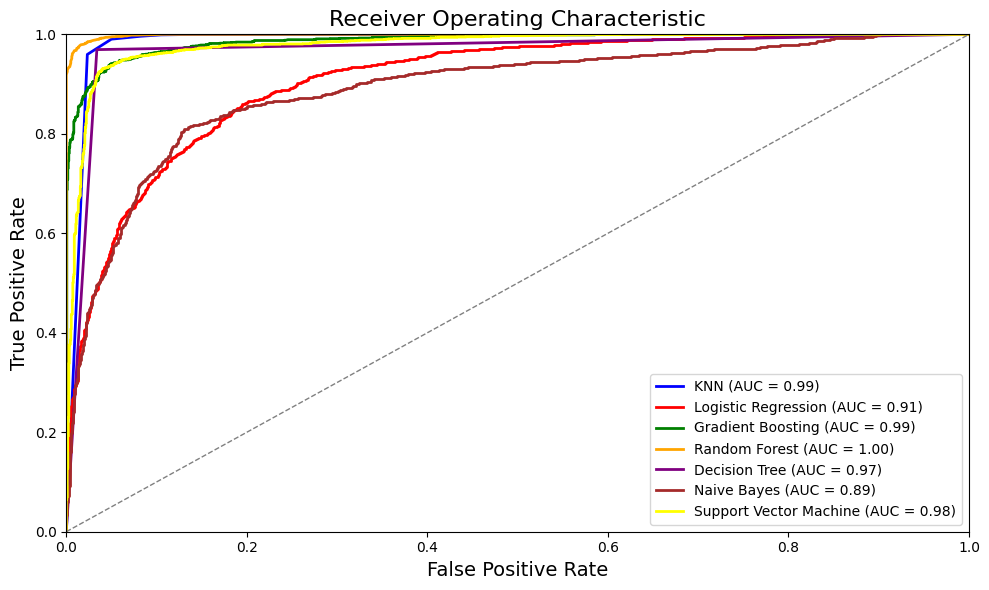

In [ ]:
from sklearn.metrics import roc_curve, auc

# Gradient Boosting
y_pred_prob_gbc = gbc.predict_proba(x_test)[:, 1]
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_test, y_pred_prob_gbc)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)

# Random Forest
y_pred_prob_rf = rf.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Decision Tree
y_pred_prob_dt = dt.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Naive Bayes
y_pred_prob_nb = nb.predict_proba(x_test)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# KNN
y_pred_prob_knn = knn.predict_proba(x_test)[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Logistic Regression
y_pred_prob_lr = lr.predict_proba(x_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# SVM
y_pred_prob_svm = svm.predict_proba(x_test)[:,1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='KNN (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_lr))
plt.plot(fpr_gbc, tpr_gbc, color='green', lw=2, label='Gradient Boosting (AUC = {:.2f})'.format(roc_auc_gbc))
plt.plot(fpr_rf, tpr_rf, color='orange', lw=2, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot(fpr_dt, tpr_dt, color='purple', lw=2, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_dt))
plt.plot(fpr_nb, tpr_nb, color='brown', lw=2, label='Naive Bayes (AUC = {:.2f})'.format(roc_auc_nb))
plt.plot(fpr_svm, tpr_svm, color='yellow', lw=2, label='Support Vector Machine (AUC = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=16)
plt.legend(loc='lower right', fontsize=10)
plt.tight_layout()
plt.show()

> Dari grafik di atas, terlihat bahwa model Random Forest memiliki kinerja yang paling baik karena garisnya mendekati sudut kiri atas dengan luas di bawah kurva (AUC) yang mencapai 1. Hal ini menunjukkan kemampuan model dalam membedakan dengan sempurna antara kelas positif dan negatif. Oleh karena itu, model Random Forest akan dipilih dan dilakukan tahap penyesuaian parameter (hyperparameter tuning) untuk memperbaiki performanya. Akan tetapi, mengingat tingkat akurasi model ini hampir menyentuh angka sempurna, perlu dilakukan pengecekan lebih lanjut apakah terjadi overfiting atau tidak.

##**5.3. Misclassification Rate Learning Curve**

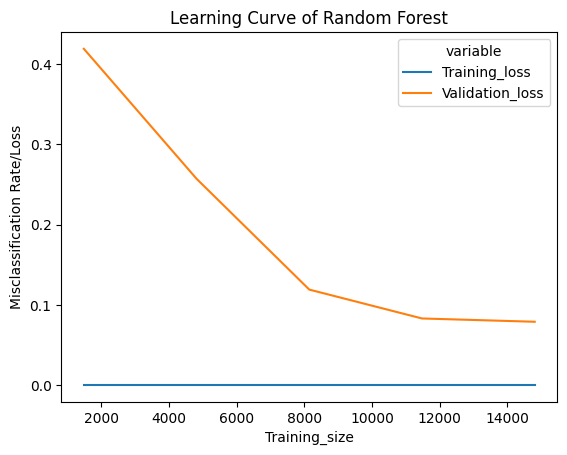

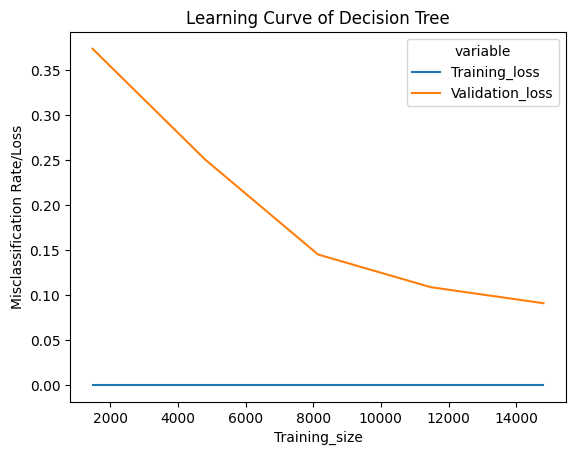

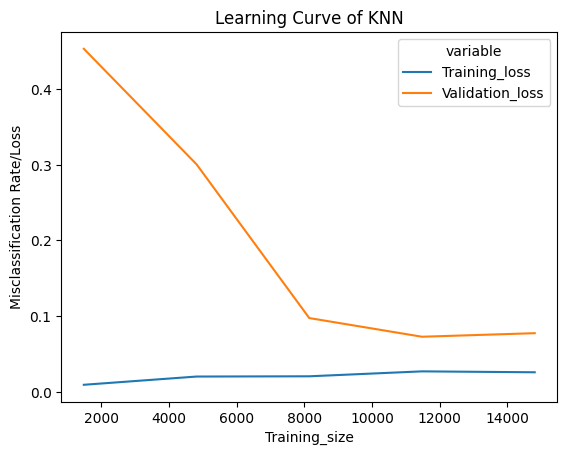

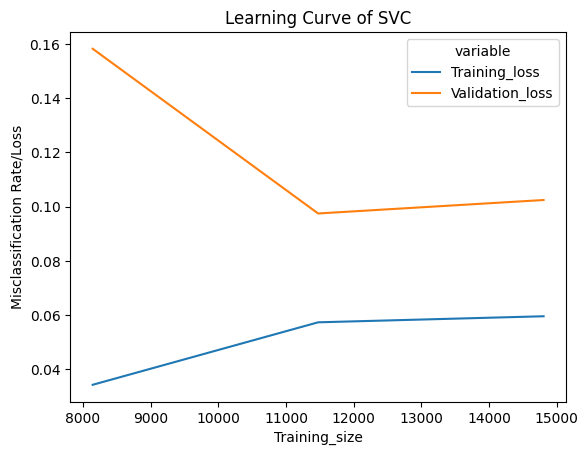

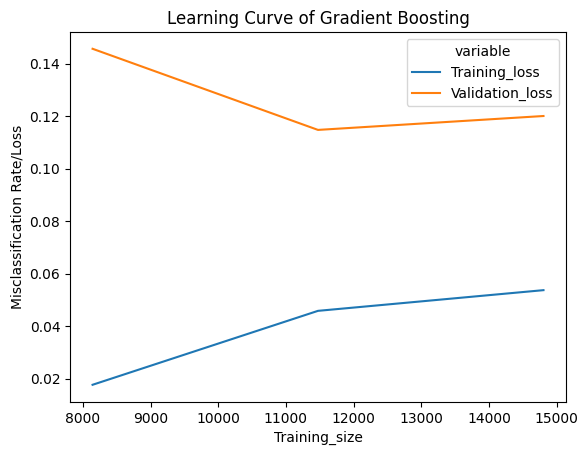

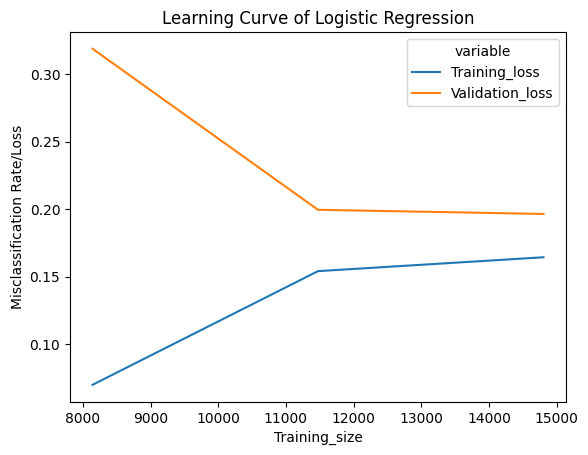

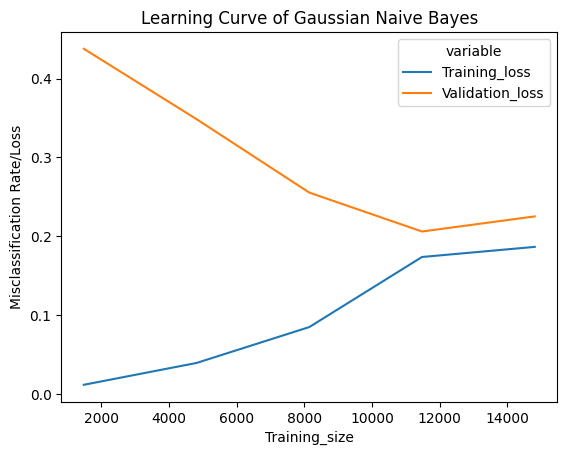

In [ ]:
from sklearn.model_selection import learning_curve

# Daftar model
models = [
    ('Random Forest', rf),
    ('Decision Tree', dt),
    ('KNN', knn),
    ('SVC', svm),
    ('Gradient Boosting', gbc),
    ('Logistic Regression', lr),
    ('Gaussian Naive Bayes', nb)
]

# Membuat learning curve untuk setiap model
for model_name, model in models:
    train_size, train_scores, test_scores = learning_curve(estimator=model, X=x_final, y=y_final, cv=5, scoring="accuracy", random_state=42)
    train_scores = 1 - np.mean(train_scores, axis=1)  # Mengonversi skor akurasi ke tingkat kesalahan klasifikasi
    test_scores = 1 - np.mean(test_scores, axis=1)  # Mengonversi skor akurasi ke tingkat kesalahan klasifikasi
    lc = pd.DataFrame({"Training_size": train_size, "Training_loss": train_scores, "Validation_loss": test_scores}).melt(id_vars="Training_size")

    # Membuat plot learning curve
    plt.figure()
    sns.lineplot(data=lc, x="Training_size", y="value", hue="variable")
    plt.title(f"Learning Curve of {model_name}")
    plt.ylabel("Misclassification Rate/Loss")
    plt.show()

> Berdasarkan learning curve diatas bisa disimpulkan bahwa model Random Forest tidak ada gejala overfitting, dimana missclassification rate pada model semakin menurun ketika sample training ditambahkan, serta gap antara training loss dan validation loss tidak terlalu lebar

In [ ]:
# Fungsi untuk mewarnai baris model Logistic Regression dengan hijau
def highlight_logistic_regression(row):
    if row['Model'] == 'Random Forest':
        return ['background-color: green'] * len(row)
    else:
        return [''] * len(row)

# Menambahkan metode highlight_logistic_regression sebagai metode style untuk dataframe
styled_results_df = results_df.style.apply(highlight_logistic_regression, axis=1)

# Menampilkan dataframe dengan highlight pada baris model Logistic Regression
display(HTML(styled_results_df.render()))

<ipython-input-281-7f69fbb7c283>:12: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  display(HTML(styled_results_df.render()))


,Model,Training Accuracy,Testing Accuracy,Training Precision,Testing Precision,Training Recall,Testing Recall,Training F1-score,Testing F1-score,Sensitivity,Specificity,AUC,Gini,KS
0,Random Forest,100.00%,98.06%,100.00%,97.96%,100.00%,98.22%,100.00%,98.09%,98.22%,97.89%,99.88%,99.76%,96.29%
1,Decision Tree,100.00%,96.77%,100.00%,96.72%,100.00%,96.93%,100.00%,96.82%,96.93%,96.61%,96.77%,93.54%,93.54%
2,KNN,97.43%,95.73%,95.19%,92.54%,99.89%,99.62%,97.48%,95.95%,99.62%,91.73%,98.67%,97.33%,94.03%
3,SVC,93.94%,93.63%,92.57%,92.06%,95.50%,95.69%,94.01%,93.84%,95.69%,91.50%,97.88%,95.76%,89.05%
4,Gradient Boosting,94.54%,93.96%,93.90%,93.05%,95.22%,95.20%,94.55%,94.11%,95.20%,92.67%,98.64%,97.29%,89.13%
5,Logistic Regression,83.20%,83.04%,82.45%,82.35%,84.19%,84.74%,83.31%,83.53%,84.74%,81.29%,90.94%,81.87%,66.44%
6,Gaussian Naive Bayes,80.79%,80.77%,77.47%,77.69%,86.64%,87.12%,81.80%,82.13%,87.12%,74.24%,89.12%,78.23%,67.87%


> Kami memilih Random Forest sebagai best model berdasarkan hasil ROC&AUC dan hasil learning curve yang menunjukkan bahwa model Random Forest dapat memprediksi dengan akurat

##**5.4. Hyperparameter Tuning**

In [ ]:
!pip install optuna
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import train_test_split

# Definisikan fungsi objektif
def objective(trial):
    # Split dataset menjadi data pelatihan dan pengujian
    X_train, X_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.2, random_state=42)

    # Menentukan hyperparameter yang akan dioptimalkan
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)

    # Inisialisasi model Random Forest dengan hyperparameter yang diuji
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Melatih model
    model.fit(X_train, y_train)

    # Menggunakan model untuk membuat prediksi
    y_pred = model.predict(X_test)

    # Menghitung skor akurasi
    recall = recall_score(y_test, y_pred)

    return recall

# Definisikan studi Optuna
study = optuna.create_study(direction='maximize')

# Mulai optimasi
study.optimize(objective, n_trials=100)

# Tampilkan hasil optimasi
print('Best trial:')
best_trial = study.best_trial
print(f'  Score: {best_trial.value:.3f}')
print('  Params: ')
for key, value in best_trial.params.items():
    print(f'    {key}: {value}')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[I 2023-05-28 12:49:55,416] A new study created in memory with name: no-name-5e2bfa7c-c1fc-4fe5-aab8-aa5777b10e55
[I 2023-05-28 12:50:27,955] Trial 0 finished with value: 0.9428571428571428 and parameters: {'n_estimators': 1000, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9428571428571428.
[I 2023-05-28 12:50:38,027] Trial 1 finished with value: 0.9272237196765498 and parameters: {'n_estimators': 1000, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9428571428571428.
[I 2023-05-28 12:50:47,660] Trial 2 finished with value: 0.9428571428571428 and parameters: {'n_estimators': 800, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9428571428571428.
[I 2023-05-28 12:50:53,398] Trial 3 finished with value: 0.9417789757412399 and parameters: {'n_estimators': 400, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 0 with value: 

Best trial:
  Score: 0.962
  Params: 
    n_estimators: 700
    max_depth: 10
    min_samples_split: 3
    min_samples_leaf: 2


In [ ]:
rf_param = {'n_estimators': 700, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 2}
best_rf = RandomForestClassifier(**rf_param).fit(x_train, y_train)
best_y_pred_rf = best_rf.predict(x_test)

##**5.5. Prediction Accuracy Test**

In [ ]:
import random

# Mendapatkan jumlah baris dalam dataframe
num_rows = len(df1)

# Mengatur jumlah data yang ingin dipilih
num_samples = min(10000, num_rows)

# Mendapatkan indeks acak dari dataframe
random_indices = random.sample(range(num_rows), num_samples)

# Memilih data secara acak dari dataframe berdasarkan indeks yang telah dihasilkan
random_data = df1.iloc[random_indices]

# Menampilkan data secara acak
random_data

,type_encode,process_temperature_c,air_temperature_c,rotational_speed_rpm,torque_nm,tool_wear_min,target
17361,0.940448,0.662133,1.176885,1.514656,-1.148905,1.750121,1
13172,-0.746370,-1.431388,-1.497636,-1.063137,1.651049,1.522541,1
2259,-0.746370,-1.011690,-0.395814,-0.193615,0.026548,0.502930,0
9824,0.741153,0.458196,1.132067,-1.226175,0.378255,-0.880941,1
12741,-0.746370,0.754353,0.828083,-0.643034,2.030925,0.948531,1
...,...,...,...,...,...,...,...
5175,0.741153,1.282710,1.256920,0.104319,-0.706386,-0.345930,0
3764,-0.746370,0.877816,1.156755,0.885389,-1.072853,0.424331,0
14419,0.741153,0.737392,1.500042,-1.125617,1.535666,0.134003,1
10024,-0.746370,0.129851,-0.421251,-1.970337,2.531677,1.658447,1


In [ ]:
# Mengambil features dari random_data untuk digunakan dalam prediksi
features = random_data[['type_encode', 'process_temperature_c', 'air_temperature_c', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']]

# Mengambil target aktual dari random_data
actual_target = random_data['target']  # Ganti 'target' dengan nama kolom target yang sesuai

# Melakukan prediksi dengan menggunakan model
predictions = best_rf.predict(features)

# Menghitung akurasi antara prediksi dan target aktual
accuracy = accuracy_score(actual_target, predictions)

# Menampilkan hasil akurasi
print("Akurasi:", accuracy*100, '%')

Akurasi: 97.14 %


> Akurasi antara prediksi dengan nilai aktual sebesar 97.14% dari 10000 data acak. Nilai akurasi yang lebih dari 75% menunjukkan bahwa model Random Forest akurat.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
print(classification_report(y_test, best_y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1801
           1       0.96      0.96      0.96      1855

    accuracy                           0.96      3656
   macro avg       0.96      0.96      0.96      3656
weighted avg       0.96      0.96      0.96      3656



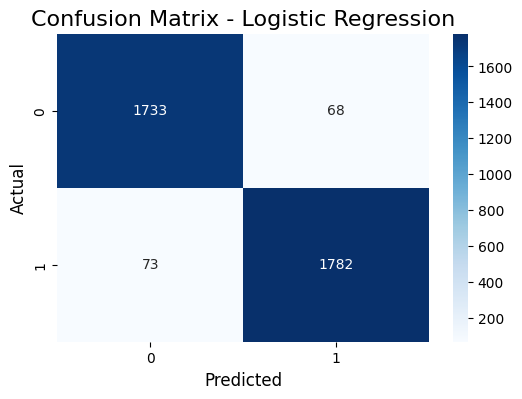

In [ ]:
# Evaluasi model dengan confusion matrix
cm = confusion_matrix(y_test, best_y_pred_rf)

# Create labels for the matrix
labels = ['0', '1']

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Logistic Regression', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

<hr>

Berdasarkan hasil evaluasi model, terdapat:

- 1782 True Positive, yang berarti model memprediksi dengan benar adanya kegagalan mesin dan mesin memang benar-benar gagal.
- 1733 True Negative, yang berarti model memprediksi dengan benar tidak ada kegagalan mesin dan mesin memang tidak gagal.
- 68 False Positive, yang berarti model salah memprediksi adanya kegagalan mesin padahal mesin sebenarnya tidak gagal.
- 73 False Negative, yang berarti model salah memprediksi tidak ada kegagalan mesin padahal mesin sebenarnya gagal.

Dalam kasus ini, baik False Positive maupun False Negative merupakan masalah yang cukup serius. Jika model memprediksi adanya kegagalan mesin tetapi mesin sebenarnya dalam kondisi normal, hal ini akan mengakibatkan pengeluaran biaya yang tidak perlu. Di sisi lain, jika model memprediksi tidak ada kegagalan mesin tetapi mesin sebenarnya gagal, maka akan terjadi kegagalan mesin yang berlanjut atau bahkan bisa berujung pada kegagalan total, yang akan mengakibatkan pengeluaran biaya yang semakin tinggi.

<hr>

##**5.6. Feature Importance**

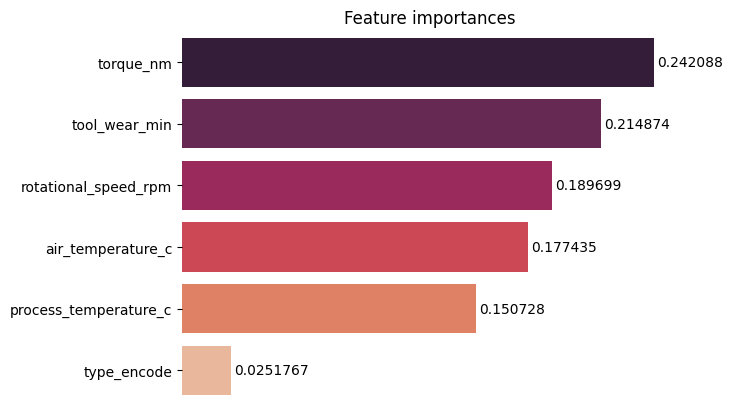

In [ ]:
rf = RandomForestClassifier(**rf_param)
rf.fit(x, y)

# Organizing feature names and importances in a DataFrame
features_df = pd.DataFrame({'features': rf.feature_names_in_, 'importances': rf.feature_importances_ })

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

> Fitur torque_nm, tool_wear_min, rotational_speed_rpm merupakan fitur yang terpenting terharap machine failure pada model Random Forest. Maka dari itu kita memerlukan tindakan khusus oleh teknisi agar mesin tetap terjaga